# Visualización de un Sistema de Control Difuso Simple

**Disciplina:** Lógica Difusa, Sistemas de Control

**Objetivo:**
El objetivo de este notebook es definir un sistema de control difuso básico para determinar la velocidad de un ventilador en función de la temperatura y la humedad. Se visualizarán las funciones de pertenencia, las reglas y el resultado de una simulación específica para entender el comportamiento del sistema.

## 1. Carga de Librerías

Para este ejercicio, se utilizarán las siguientes librerías:
* **`numpy`**: Para la creación de los universos de discurso (rangos numéricos) de las variables difusas.
* **`skfuzzy` y `skfuzzy.control`**: Para todas las funcionalidades relacionadas con la lógica difusa, incluyendo la definición de antecedentes, consecuentes, funciones de pertenencia y la creación del sistema de control.
* **`matplotlib.pyplot`**: Para la visualización de las funciones de pertenencia y los resultados de la simulación.

In [11]:
# Importar librerías necesarias
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Configuración para mostrar gráficos inline en Jupyter Notebook (opcional en script)
%matplotlib inline

## 2. Definición del Problema: Control de un Ventilador

Se desea controlar la velocidad de un ventilador basándose en dos entradas:
* **Temperatura Ambiente:** Qué tan caliente o fría está la habitación.
* **Humedad Relativa:** Qué tan seco o húmedo está el aire.

La salida será la potencia o velocidad del ventilador.

* **Antecedentes (Entradas)**
   - `temperatura`
      * Universo: 0°C a 40°C
      * Conjuntos difusos: frio, templado, caliente
   - `humedad`
      * Universo: 0% a 100%
      * Conjuntos difusos: seca, normal, humeda
* **Consecuentes (Salidas)**
   - `ventilador` (potencia/velocidad)
      * Universo: 0% a 100%
      * Conjuntos difusos: bajo, medio, alto
* **Reglas**
   - SI la *temperatura* es caliente Y la *humedad* es húmeda, ENTONCES el ventilador estará alto.
   - SI la *temperatura* es templada Y la *humedad* es normal, ENTONCES el ventilador estará medio.
   - SI la *temperatura* es fría O la *humedad* es seca, ENTONCES el ventilador estará bajo.

## 3. Desarrollo del Sistema de Control Difuso

### 3.1. Definición de Variables del Universo y Funciones de Pertenencia

**Objetivo:**
Crear los objetos Antecedente para las entradas (temperatura, humedad) y Consecuente para la salida (ventilador). Luego, definir sus respectivas funciones de pertenencia usando funciones triangulares (`trimf`).

In [12]:
# Definir las variables de entrada (Antecedentes) y salida (Consecuente)
temperatura = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura')
humedad = ctrl.Antecedent(np.arange(0, 101, 1), 'humedad')
ventilador = ctrl.Consequent(np.arange(0, 101, 1), 'ventilador')

# Definir los conjuntos difusos (funciones de pertenencia) para cada variable
# Temperatura
temperatura['frio'] = fuzz.trimf(temperatura.universe, [0, 0, 20])
temperatura['templado'] = fuzz.trimf(temperatura.universe, [10, 20, 30])
temperatura['caliente'] = fuzz.trimf(temperatura.universe, [20, 40, 40])

# Humedad
humedad['seca'] = fuzz.trimf(humedad.universe, [0, 0, 50])
humedad['normal'] = fuzz.trimf(humedad.universe, [30, 50, 70])
humedad['humeda'] = fuzz.trimf(humedad.universe, [50, 100, 100])

# Ventilador (Salida)
ventilador['bajo'] = fuzz.trimf(ventilador.universe, [0, 0, 50])
ventilador['medio'] = fuzz.trimf(ventilador.universe, [25, 50, 75])
ventilador['alto'] = fuzz.trimf(ventilador.universe, [50, 100, 100])

### 3.2. Visualización de las Funciones de Pertenencia

**Objetivo:** Mostrar gráficamente cómo se han definido los conjuntos difusos para cada variable.

Visualizando Funciones de Pertenencia:


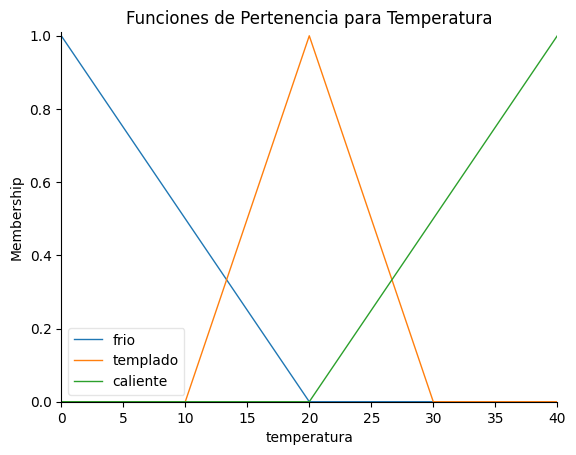

In [13]:
# Visualizar las variables de entrada y salida con sus funciones de pertenencia
print("Visualizando Funciones de Pertenencia:")
temperatura.view()
plt.title("Funciones de Pertenencia para Temperatura")
plt.show()

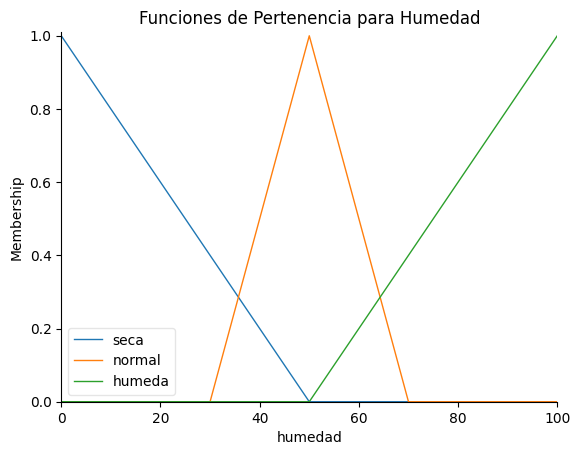

In [14]:
humedad.view()
plt.title("Funciones de Pertenencia para Humedad")
plt.show()

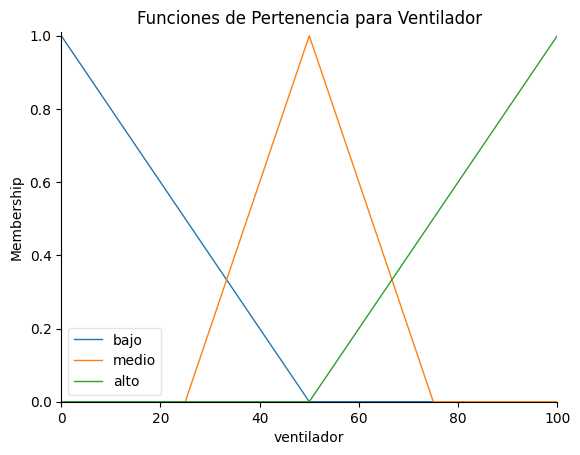

In [15]:
ventilador.view()
plt.title("Funciones de Pertenencia para Ventilador")
plt.show()

### 3.3. Definición de las Reglas Difusas

**Objetivo:** Establecer las reglas que conectan las condiciones de entrada (temperatura y humedad) con la acción de salida (velocidad del ventilador).

In [16]:
# Definir las reglas
print("\nDefiniendo las Reglas Difusas...")
regla1 = ctrl.Rule(temperatura['caliente'] & humedad['humeda'], ventilador['alto'])
regla2 = ctrl.Rule(temperatura['templado'] & humedad['normal'], ventilador['medio'])
regla3 = ctrl.Rule(temperatura['frio'] | humedad['seca'], ventilador['bajo'])
print("Reglas definidas.")


Definiendo las Reglas Difusas...
Reglas definidas.


### 3.4. Creación del Sistema de Control y Simulación

**Objetivo:** Ensamblar las reglas en un sistema de control y preparar una simulación para probarlo.

In [17]:
# Crear el sistema de control
print("\nCreando el Sistema de Control...")
# Asegurarse que la lista de reglas es correcta
sistema_control_ventilador = ctrl.ControlSystem([regla1, regla2, regla3])
print("Sistema de Control creado.")


Creando el Sistema de Control...
Sistema de Control creado.


In [18]:
# Crear la simulación del sistema de control
print("\nCreando la Simulación del Sistema de Control...")
simulacion_ventilador = ctrl.ControlSystemSimulation(sistema_control_ventilador)
print("Simulación creada.")


Creando la Simulación del Sistema de Control...
Simulación creada.


### 3.5. Simulación con Entradas Específicas y Visualización del Resultado

**Objetivo:** Proporcionar valores de entrada específicos al sistema (temperatura = 30°C, humedad = 80%) y observar la salida calculada para la velocidad del ventilador.

**Proceso:**
1. Asignar los valores de entrada a la simulación.
2. Ejecutar el método `compute()`.
3. Imprimir el valor de salida numérico.
4. Visualizar la variable de salida `ventilador` con el resultado de la simulación, mostrando la agregación de las reglas y el punto de desfusificación.

In [19]:
# Establecer valores de entrada para la simulación
print("\nEstableciendo entradas para la simulación:")
temp_input = 30  # Temperatura caliente
hum_input = 80   # Humedad alta
simulacion_ventilador.input['temperatura'] = temp_input
simulacion_ventilador.input['humedad'] = hum_input
print(f"  Temperatura de entrada: {temp_input}°C")
print(f"  Humedad de entrada: {hum_input}%")


Estableciendo entradas para la simulación:
  Temperatura de entrada: 30°C
  Humedad de entrada: 80%



Calculando la salida del sistema difuso...
Potencia del ventilador calculada: 80.56%


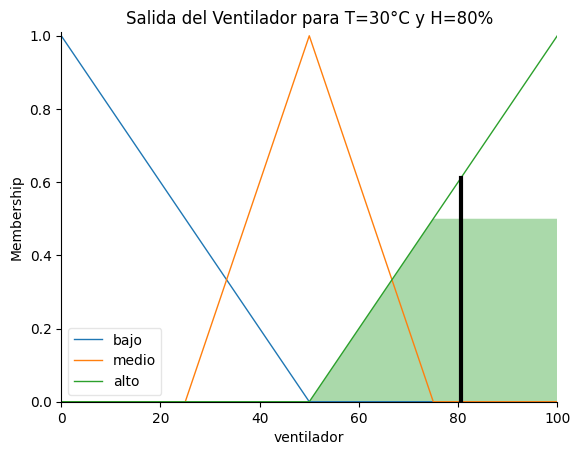

In [20]:
# Calcular la salida
print("\nCalculando la salida del sistema difuso...")
try:
    simulacion_ventilador.compute()
    # Mostrar el valor específico de salida
    valor_salida_ventilador = simulacion_ventilador.output['ventilador']
    print(f"Potencia del ventilador calculada: {valor_salida_ventilador:.2f}%")

    # Visualizar el resultado (esto muestra el efecto de las reglas y la desfusificación)
    ventilador.view(sim=simulacion_ventilador)
    plt.title("Salida del Ventilador para T=30°C y H=80%")
    plt.show()

except Exception as e:
    print(f"Error durante la computación o visualización: {e}")
    print("Asegúrese de que las entradas activan al menos una regla.")

## 4. Conclusiones del Ejercicio

**Interpretación del Resultado:**
Con una temperatura de 30°C (considerada 'templada' y 'caliente' con diferentes grados de pertenencia) y una humedad del 80% (considerada 'normal' y 'húmeda'), el sistema difuso calculó una potencia para el ventilador de [**Completar con el valor obtenido**]%.
La visualización de la variable de salida `ventilador` muestra cómo las reglas activadas contribuyen a la forma del conjunto difuso agregado y dónde se ubica el valor desfusificado (centroide, por defecto).

**Aprendizaje General:**
Este ejemplo simple ilustra los componentes fundamentales de un sistema de control de lógica difusa:
1. **Variables Lingüísticas:** Definición de entradas y salidas en términos cualitativos.
2. **Funciones de Pertenencia:** Mapeo de valores nítidos a grados de pertenencia en conjuntos difusos.
3. **Reglas Difusas:** Captura del conocimiento experto o del comportamiento deseado en formato "SI-ENTONCES".
4. **Mecanismo de Inferencia:** Agregación de las salidas de las reglas activadas.
5. **Desfusificación:** Conversión del conjunto difuso agregado resultante en un valor nítido accionable.

La librería `skfuzzy` proporciona una API intuitiva para construir y simular estos sistemas. La capacidad de visualizar las funciones de pertenencia y el proceso de inferencia es muy útil para el diseño y ajuste del sistema.

*(Nota: El valor específico de la potencia del ventilador debe completarse después de ejecutar el notebook).**